# SEN163A - Fundamentals of Data Analytics
# Assignment 1 - Data consistency
### Ir. Jacopo De Stefani - [J.deStefani@tudelft.nl](mailto:J.deStefani@tudelft.nl)
### Joao Pizani Flor, M.Sc. - [J.p.pizaniflor@tudelft.nl](mailto:J.p.pizaniflor@tudelft.nl)

## Group X
- Student 1 - ''Student ID1''
- Student 2 - ''Student ID2''
- Student 3 - ''Student ID3''
- Student 4 - ''Student ID4''

## Evaluation criteria
The final grade for this assignment will be calculated based on the following criteria:

- $\textbf{Quality of the report}$ - 35\%
    - Reasonable formatting of the document and used citation appropriately
    - Use of proper English (typos, grammar)
    - Code script deliverable
    - Code quality
    - Problem Description
    - Dataset Description
    - Limitations
    - Conclusion/Action recommendations

- $\textbf{Identification of the problems in the database}$ - 65\%


# Data Manipulation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify as sq

data = pd.read_csv('transactions.csv')
data

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
7734829,743,TRANSFER,0.01,C1162922333,6311409.28,6311409.27,C52983754,13721.94,13721.95
7734830,743,TRANSFER,6311409.28,C1162922333,6311409.28,0.00,C1365125890,351848.64,6663257.91
7734831,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52
7734832,743,TRANSFER,850002.52,C1280323807,850002.52,-0.01,C873221189,8150751.04,9000753.55


# Dataset Description

In [ ]:
## Text description of Data

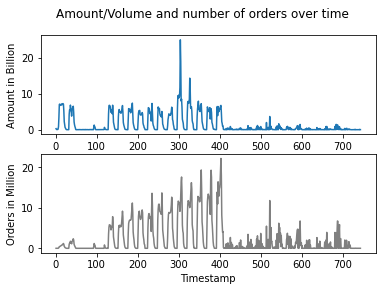

In [31]:
#Calculations
sumamount=data.groupby(['timestamp'])['amount'].sum()
sumtransactions=data.groupby(['timestamp'])['timestamp'].sum()

#Plotting
plt.suptitle('Amount/Volume and number of orders over time')
plt.subplot(2,1,1)
plt.plot(sumamount/1000000000)
plt.ylabel('Amount in Billion')
plt.subplot(2,1,2)
plt.plot(sumtransactions/1000000, color= 'grey')
plt.ylabel('Orders in Million')
plt.xlabel('Timestamp')
plt.show()





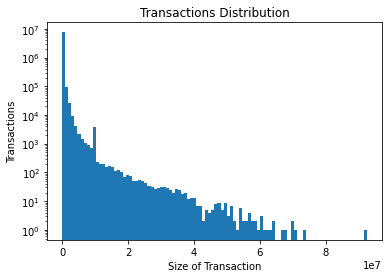

In [32]:
plt.hist(data['amount'], bins= 100, log=True)
plt.title('Transactions Distribution')
plt.xlabel('Size of Transaction')
plt.ylabel('Transactions')
plt.show()

## 

In [26]:
sumorderspercustomer=data.groupby(['nameOrig'])['timestamp'].sum()

volumepercustomer=data.groupby(['nameOrig'])['amount'].sum()

nameOrig
C1715283297    92445516.64
C2127282686    73823490.36
C2044643633    71172480.42
C1425667947    69886731.30
C1584456031    69337316.28
C811810230     67500761.29
C420748282     66761272.21
C1139847449    64234448.19
C300140823     63847992.59
C372535854     63294839.63
Name: amount, dtype: float64


Text(0.5, 0, 'Volume Size')

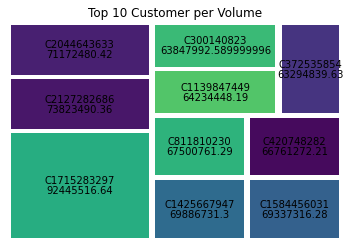

In [29]:
Top10Customer=volumepercustomer.nlargest(10)
print(Top10Customer)

size=[16,8,8,6,6,6,6,6,6,6]

sq.plot(sizes=size, label=Top10Customer.index, pad = True, value= Top10Customer)
plt.axis('off')
plt.title('Top 10 Customer per Volume')
plt.xlabel('Volume Size')
#plt.legend(Top10Customer)

nameOrig
C1286084959    3825
C1374569953    2080
C1934858363    2080
C807221466     2066
C1194120440    2030
C1521592340    2004
C2053049853    1984
C369448390     1980
C614844959     1943
C284997424     1908
Name: timestamp, dtype: int64


Text(0.5, 0, 'Volume Size')

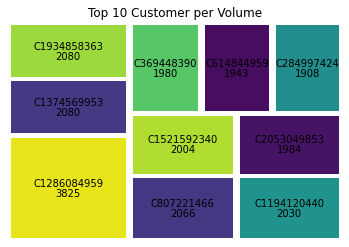

In [36]:
Top10Customer=sumorderspercustomer.nlargest(10)
print(Top10Customer)

sq.plot(sizes=Top10Customer, label=Top10Customer.index, pad = True, value= Top10Customer)
plt.axis('off')
plt.title('Top 10 Customer per Volume')
plt.xlabel('Volume Size')
#plt.legend(Top10Customer)

In [ ]:
## Transactions pattern
## --> one sender many destionations
## --> many transaction between two destination
## --> microtransation
## --> thresholds 10k 50ct
## --> multiple microtransactions in one timestamp

# Dataset Consistency

In [38]:
#empty cells analysis ## Sophian checks if this is right
data.dropna()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
7734829,743,TRANSFER,0.01,C1162922333,6311409.28,6311409.27,C52983754,13721.94,13721.95
7734830,743,TRANSFER,6311409.28,C1162922333,6311409.28,0.00,C1365125890,351848.64,6663257.91
7734831,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52
7734832,743,TRANSFER,850002.52,C1280323807,850002.52,-0.01,C873221189,8150751.04,9000753.55


In [40]:
#Duplicates ## Sophian 
data.drop_duplicates()

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.00,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.00,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
7734829,743,TRANSFER,0.01,C1162922333,6311409.28,6311409.27,C52983754,13721.94,13721.95
7734830,743,TRANSFER,6311409.28,C1162922333,6311409.28,0.00,C1365125890,351848.64,6663257.91
7734831,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,850002.52
7734832,743,TRANSFER,850002.52,C1280323807,850002.52,-0.01,C873221189,8150751.04,9000753.55


In [ ]:
## Jonathan checks balance = amount

In [41]:
#check data types and wrong data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7734834 entries, 0 to 7734833
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   timestamp       int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 531.1+ MB


# Fraud Identification

In [ ]:
### Your code goes here

# Conclusion